In [9]:
import keras
from keras.models import Sequential
from keras.layers import Input
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.datasets import mnist
import numpy as np
import pandas as pd

In [40]:
(xTrain, yTrain), (xTest, yTest) = mnist.load_data()

In [41]:
xTrain.shape

(60000, 28, 28)

In [42]:
xTrain[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

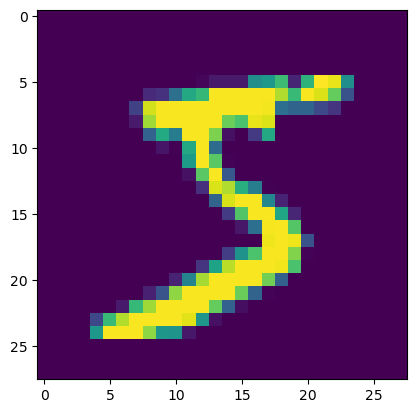

In [43]:
plt.imshow(xTrain[0])

In [44]:
yTrain[0]

5

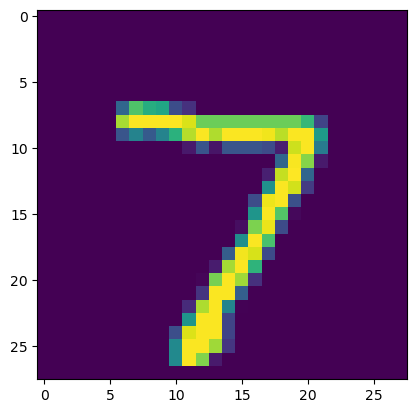

In [45]:
plt.imshow(xTest[0])

In [46]:
yTest[0]

7

In [47]:
num_pixels = xTrain.shape[1] * xTrain.shape[2] # Find size of one-dimensional vector
xTrain = xTrain.reshape(xTrain.shape[0], num_pixels).astype('float32')
xTest = xTest.reshape(xTest.shape[0], num_pixels).astype('float32')

In [48]:
xTrain /= 255
xTest /= 255
yTrain = to_categorical(yTrain)
yTest = to_categorical(yTest)
num_classes = yTest.shape[1]
print(num_classes)

10


In [49]:
def classification_model():
    model = Sequential()
    model.add(Input(shape = (num_pixels,)))
    model.add(Dense(num_pixels, activation = 'relu'))
    model.add(Dense(100, activation = 'relu'))
    model.add(Dense(num_classes, activation = 'softmax'))
    model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

In [67]:
model = classification_model()
model.fit(xTrain, yTrain, validation_data = (xTest, yTest), epochs = 100, verbose = 2)
scores = model.evaluate(xTest, yTest, verbose = 0)

Epoch 1/100
1875/1875 - 8s - 4ms/step - accuracy: 0.9442 - loss: 0.1844 - val_accuracy: 0.9695 - val_loss: 0.0984
Epoch 2/100
1875/1875 - 7s - 4ms/step - accuracy: 0.9764 - loss: 0.0768 - val_accuracy: 0.9666 - val_loss: 0.1026
Epoch 3/100
1875/1875 - 7s - 4ms/step - accuracy: 0.9829 - loss: 0.0541 - val_accuracy: 0.9770 - val_loss: 0.0778
Epoch 4/100
1875/1875 - 7s - 4ms/step - accuracy: 0.9872 - loss: 0.0403 - val_accuracy: 0.9780 - val_loss: 0.0776
Epoch 5/100
1875/1875 - 7s - 4ms/step - accuracy: 0.9906 - loss: 0.0294 - val_accuracy: 0.9800 - val_loss: 0.0749
Epoch 6/100
1875/1875 - 7s - 4ms/step - accuracy: 0.9916 - loss: 0.0259 - val_accuracy: 0.9775 - val_loss: 0.0821
Epoch 7/100
1875/1875 - 7s - 4ms/step - accuracy: 0.9920 - loss: 0.0243 - val_accuracy: 0.9713 - val_loss: 0.1129
Epoch 8/100
1875/1875 - 7s - 4ms/step - accuracy: 0.9940 - loss: 0.0193 - val_accuracy: 0.9787 - val_loss: 0.0892
Epoch 9/100
1875/1875 - 7s - 4ms/step - accuracy: 0.9947 - loss: 0.0165 - val_accuracy: 

In [68]:
print('Accuracy ', scores[1], '\n Error ', 1-scores[1])

Accuracy  0.9824000000953674 
 Error  0.01759999990463257


In [69]:
model.save('classification_model.keras')

In [70]:
pretrained_model = keras.saving.load_model('classification_model.keras')

In [71]:
predictions = model.predict(xTest)  # Predict probabilities for each class


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [72]:
import numpy as np

predicted_labels = np.argmax(predictions, axis=1)  # Get class with highest probability
print(predicted_labels[:10])  # Prints the predicted labels for the first 10 test images


[7 2 1 0 4 1 4 9 5 9]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted class: 9


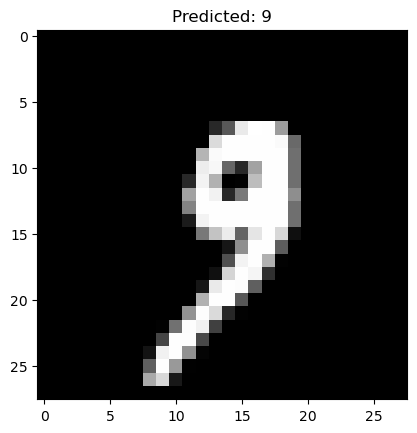

In [73]:
import matplotlib.pyplot as plt

# Example: Use the first image from the test dataset
image = xTest[1000].reshape(1, 784)  # Reshape to match input shape (1, 784)
prediction = model.predict(image)

# Get the predicted class
predicted_class = np.argmax(prediction)
print(f"Predicted class: {predicted_class}")

# Display the image
plt.imshow(xTest[1000].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {predicted_class}")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted class for custom image: 9


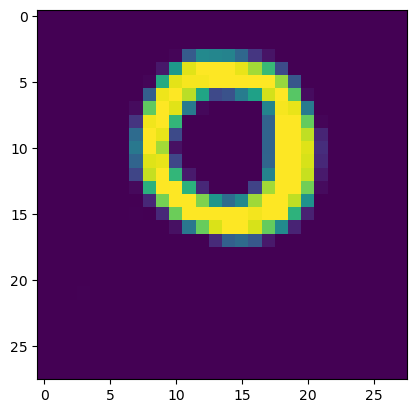

In [82]:
# use model for custom handwritting
from PIL import Image
import numpy as np

# Load and preprocess a custom image
custom_image = Image.open('digit.png').convert('L')  # Load in grayscale
custom_image = custom_image.resize((28, 28))  # Resize to 28x28
plt.imshow(custom_image)
custom_image = np.array(custom_image).reshape(1, 784)  # Flatten to (1, 784)
custom_image = custom_image / 255.0  # Normalize

prediction = model.predict(custom_image)
predicted_class = np.argmax(prediction)
print(f"Predicted class for custom image: {predicted_class}")
